In [1]:
#!/usr/bin/python3

import sys,os
import numpy as np
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

def MAPE(data,prediction):
    mask= ~np.isnan(data)
    mape = np.mean(np.abs((data - prediction)/data)[mask])*100
    return mape

def colorbar(mappable,dolabel=''):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    return fig.colorbar(mappable, cax=cax, label=dolabel)

# "Viridis-like" colormap with white background
white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

acmap = matplotlib.colormaps.get_cmap('gist_ncar_r')
acmap = matplotlib.colormaps.get_cmap('viridis')
colors=acmap(np.arange(acmap.N))
newcolors=colors.copy()
newcolors[0]=[1.   , 1.   , 1., 1.   ]
white_gist_ncar_r = ListedColormap(newcolors)

In [2]:
DF=pd.read_csv('/raid1/ml4ao/run_analytic/V4/RUN_V4_ANALYTIC_ESTIMATES.csv')

print(DF.columns.to_list())
['DateTime', 'wind speed mean (TRUE)', 'wind LEVEL 1 (TRUE)', 'wind LEVEL 2 (TRUE)', 'wind LEVEL 3 (TRUE)', 'wind LEVEL 4 (TRUE)', 'wind speed (EST)', 'r0 TRUE[m]', 'r0 EST[m]', 'seeing TRUE[arcsec]', 'seeing EST[arcsec]', 'SR TRUE[frac]', 'SR EST[frac]', 'total time [s]', 'controlled modes']

ANALYSIS_DICT={}
ANALYSIS_DICT['wind speed mean (TRUE)']='wind speed (EST)'
ANALYSIS_DICT['wind LEVEL 1 (TRUE)']='wind speed (EST)'
ANALYSIS_DICT['wind LEVEL 2 (TRUE)']='wind speed (EST)'
ANALYSIS_DICT['wind LEVEL 3 (TRUE)']='wind speed (EST)'
ANALYSIS_DICT['wind LEVEL 4 (TRUE)']='wind speed (EST)'
ANALYSIS_DICT['r0 TRUE[m]']='r0 EST[m]'
ANALYSIS_DICT['seeing TRUE[arcsec]']='seeing EST[arcsec]'
ANALYSIS_DICT['SR TRUE[frac]']='SR EST[frac]'

for key in ANALYSIS_DICT:
    mape_value=MAPE(DF[key].values,DF[ANALYSIS_DICT[key]].values)
    print('MAPE '+key+'=',mape_value)

my_dpi=300
font_size=12

['DateTime', 'wind speed mean (TRUE)', 'wind LEVEL 1 (TRUE)', 'wind LEVEL 2 (TRUE)', 'wind LEVEL 3 (TRUE)', 'wind LEVEL 4 (TRUE)', 'wind speed (EST)', 'r0 TRUE[m]', 'r0 EST[m]', 'seeing TRUE[arcsec]', 'seeing EST[arcsec]', 'SR TRUE[frac]', 'SR EST[frac]', 'total time [s]', 'controlled modes']
MAPE wind speed mean (TRUE)= 310.6937784936467
MAPE wind LEVEL 1 (TRUE)= 766.0596387834516
MAPE wind LEVEL 2 (TRUE)= 617.1535040477653
MAPE wind LEVEL 3 (TRUE)= 599.16407760259
MAPE wind LEVEL 4 (TRUE)= 115.30258716084869
MAPE r0 TRUE[m]= 39.51271830867803
MAPE seeing TRUE[arcsec]= 12.915707827927855
MAPE SR TRUE[frac]= 31.84440469701598


In [3]:
for key in ANALYSIS_DICT:

    mask= ~np.isnan(DF[key].values)

    title_label=""
    fig=plt.figure(figsize=(2000./my_dpi, 2000./my_dpi), dpi=my_dpi)
    ax1 = plt.subplot(1,1,1, projection='scatter_density')
    plt.rcParams['axes.labelsize'] = font_size
    plt.rcParams['xtick.labelsize'] = font_size
    plt.rcParams['ytick.labelsize'] = font_size
    density=ax1.scatter_density(DF[key].values[mask],DF[ANALYSIS_DICT[key]].values[mask],cmap=white_viridis)
#    density=ax1.scatter_density(DF[key].values,DF[ANALYSIS_DICT[key]].values,cmap=white_gist_ncar_r)

    colorbar(density,dolabel='Number of points per pixel')
    xlim=ax1.get_xlim()
    ylim=ax1.get_ylim()
    limlow=min(xlim[0],ylim[0])
    limhigh=max(xlim[1],ylim[1])
    plt.xlim(limlow,limhigh)
    plt.ylim(limlow,limhigh)
    ax1.plot([limlow,limhigh], [limlow,limhigh],color='k',lw=1,ls='dashed')
    #ax1.plot([0, 1], [0, 1], transform=ax1.transAxes, color='k',lw=2,ls='dashed')
#plt.scatter(CatalogDf['teff_spectro'].values,CatalogDf['PredictedTemp'].values)
    plt.tick_params(which='both')
    plt.tick_params(which='major', length=7)
    plt.tick_params(which='minor', length=4)
    plt.minorticks_on()
#    plt.title(title_label,fontsize=font_size+1.4, y=1.15)
#plt.xlabel("Spectroscopic Teff (K)",fontsize=font_size+1)
#plt.ylabel('ML predicted Teff (K)',fontsize=font_size+2)
    ax1.set_xlabel(key,fontsize=font_size+1)
    ax1.set_ylabel(ANALYSIS_DICT[key],fontsize=font_size+2)
    plt.tight_layout()
    #ax1.set_aspect('equal', 'box')
    ax1.set_xlim(limlow,limhigh)
    ax1.set_ylim(limlow,limhigh)

    fileout=key+'_'+ANALYSIS_DICT[key]+'_scatter.png'
    plt.savefig(fileout,dpi=my_dpi)
    print("Creato file con plot:", fileout)
    plt.close()

/opt/anaconda3/envs/base11/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/opt/anaconda3/envs/base11/lib/python3.11/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


Creato file con plot: wind speed mean (TRUE)_wind speed (EST)_scatter.png
Creato file con plot: wind LEVEL 1 (TRUE)_wind speed (EST)_scatter.png
Creato file con plot: wind LEVEL 2 (TRUE)_wind speed (EST)_scatter.png
Creato file con plot: wind LEVEL 3 (TRUE)_wind speed (EST)_scatter.png
Creato file con plot: wind LEVEL 4 (TRUE)_wind speed (EST)_scatter.png
Creato file con plot: r0 TRUE[m]_r0 EST[m]_scatter.png
Creato file con plot: seeing TRUE[arcsec]_seeing EST[arcsec]_scatter.png
Creato file con plot: SR TRUE[frac]_SR EST[frac]_scatter.png


In [4]:
r0_avg = 0.60
dr0 = 0.038
r0_min = r0_avg - dr0
r0_max = r0_avg + dr0

seeing_avg = 0.9759 * 0.5/(r0_avg*4.848)
seeing_max = 0.9759 * 0.5/(r0_min*4.848)
seeing_min = 0.9759 * 0.5/(r0_max*4.848)

In [5]:
print(seeing_min, seeing_max)

0.15775823271982373 0.17909208625488887


In [6]:
print(0.5 * (seeing_max-seeing_min)/seeing_avg)

0.06358839344481759


In [7]:
print(0.5 * (seeing_max-seeing_min))

0.010666926767532572


In [8]:
import matplotlib.pyplot as plt 
import numpy as np 



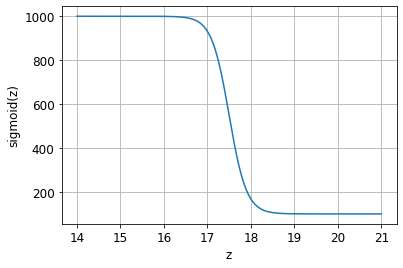

In [19]:
z = np.linspace(14, 21, 1900) 
def sigmoid(z):
    return 900.0/(1 + np.exp((z-17.5)*5)) + 100

a = sigmoid(z)
plt.plot(z, a) 
plt.xlabel("z") 
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()